In [289]:
print(np.__version__)


1.19.2


In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
# %matplotlib inline
%matplotlib notebook

from sklearn.metrics import r2_score
from sklearn import datasets, linear_model

In [227]:
# opening earthquake data
eq_df = pd.read_csv('../oklahoma_earthquakes_largefiles/usgs_eqs_reduced_data.csv', low_memory=False)
# converting date fields to date-time dtype
eq_df.iloc[:, 10] = eq_df.iloc[:, 10].apply(pd.to_datetime

In [4]:
eq_df.head()

,id,time,mag,magType,cdi,place,status,latitude,longitude,depth,date
0,us2000iz6u,1546166814510,2.2,mb_lg,NaN,"6 km ESE of Cleo Springs, Oklahoma",reviewed,36.3818,-98.3804,6.01,2018-12-30 10:46:54.510
1,us2000iz51,1546159833730,2.0,mb_lg,NaN,"5 km ESE of Cleo Springs, Oklahoma",reviewed,36.3917,-98.3808,6.28,2018-12-30 08:50:33.730
2,us2000iz4w,1546158498840,2.2,ml,NaN,"13 km NNW of Pawnee, Oklahoma",reviewed,36.4443,-96.8762,5.36,2018-12-30 08:28:18.840
3,us2000iyvs,1546073324730,2.5,mb_lg,3.3,"5 km WSW of Arcadia, Oklahoma",reviewed,35.6547,-97.3898,5.00,2018-12-29 08:48:44.730
4,us2000iyvq,1546073222930,2.2,mb_lg,NaN,"6 km W of Arcadia, Oklahoma",reviewed,35.6747,-97.3990,7.42,2018-12-29 08:47:02.930


In [54]:
# opening injection volume data, converting date fields to date-time dtype
# Note, this injection data is incorreect for further use
injection_df = pd.read_csv('../oklahoma_earthquakes_largefiles/weekly_volume.csv', low_memory=False)
injection_df.iloc[:, 0] = injection_df.iloc[:, 0].apply(pd.to_datetime)
injection_df.head()

,Report_Date,Volume_BPD
0,2014-12-31,3246.0
1,2014-12-30,3373.0
2,2014-12-29,3508.0
3,2014-12-28,3363.0
4,2014-12-27,3226.0


In [170]:
monthly_sum_inj = injection_df.groupby(pd.Grouper(key="Report_Date",freq='M'))["Volume_BPD"].sum()
monthly_sum_inj_df = pd.DataFrame(monthly_sum_inj)
monthly_sum_inj_df.head()

,Volume_BPD
Report_Date,
2012-09-30,16549.0
2012-10-31,81535.0
2012-11-30,74800.0
2012-12-31,241705.0
2013-01-31,460607.0


In [171]:
monthly_sum_inj_df.max()

Volume_BPD    7.599133e+07
dtype: float64

In [112]:
mag_3 = eq_df[eq_df["mag"] >= 3]
mag_3.head()

,id,time,mag,magType,cdi,place,status,latitude,longitude,depth,date
5,us2000iytp,1546056357890,3.0,mb_lg,3.1,"3 km ESE of Hennessey, Oklahoma",reviewed,36.0998,-97.8674,5.00,2018-12-29 04:05:57.890
7,us2000iym1,1546000348980,3.1,mb_lg,2.7,"5 km ESE of Cleo Springs, Oklahoma",reviewed,36.3858,-98.3860,5.00,2018-12-28 12:32:28.980
11,us2000iwfw,1545520825020,3.1,ml,NaN,"0 km SE of Wakita, Oklahoma",reviewed,36.8790,-97.9152,7.21,2018-12-22 23:20:25.020
17,us2000iud8,1545032568230,3.0,mb_lg,2.0,"16 km SSE of Waynoka, Oklahoma",reviewed,36.4566,-98.7897,5.00,2018-12-17 07:42:48.230
19,us2000itxh,1544909464050,3.0,mb_lg,2.2,"5 km WNW of Lucien, Oklahoma",reviewed,36.2856,-97.5158,4.86,2018-12-15 21:31:04.050


In [176]:
monthly_count_eq = mag_3.groupby(pd.Grouper(key="date",freq='M'))["mag"].count()
monthly_count_eq_df = pd.DataFrame(monthly_count_eq)
monthly_count_eq_df.head()

,mag
date,
2009-01-31,1
2009-02-28,3
2009-03-31,1
2009-04-30,0
2009-05-31,0


<IPython.core.display.Javascript object>


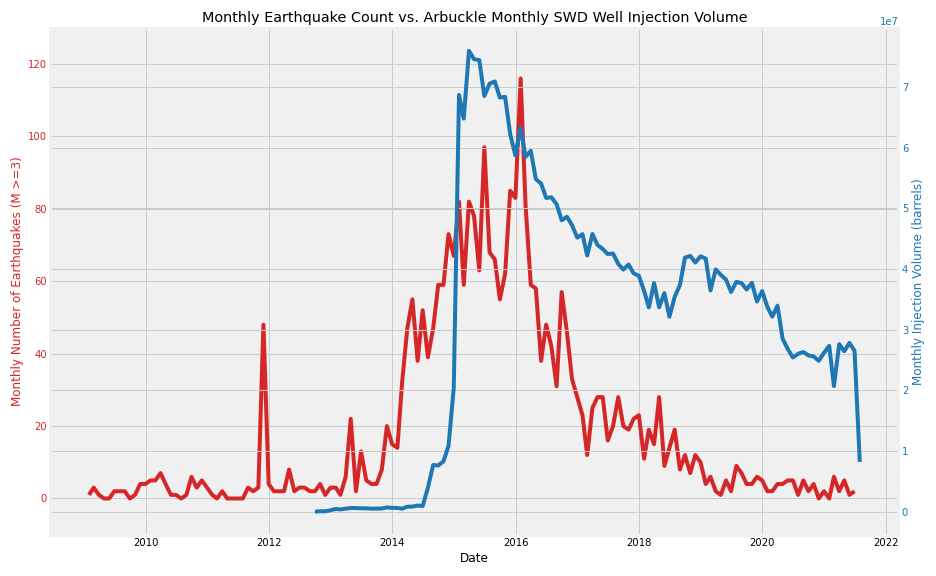

In [302]:
# Barrel
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.plot(monthly_count_eq_df.index, monthly_count_eq_df.mag, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-10, 130)
ax1.set_title("Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Injection Volume (barrels)', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_sum_inj_df.index, monthly_sum_inj_df.Volume_BPD, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0, 13000)

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [179]:
mean_monthly_inj = injection_df.groupby(pd.Grouper(key="Report_Date",freq='M'))["Volume_BPD"].mean()
monthly_mean_inj_df = pd.DataFrame(mean_monthly_inj)
monthly_mean_inj_df.head()

,Volume_BPD
Report_Date,
2012-09-30,1654.900000
2012-10-31,2630.161290
2012-11-30,2493.333333
2012-12-31,2177.522523
2013-01-31,2971.658065


<IPython.core.display.Javascript object>


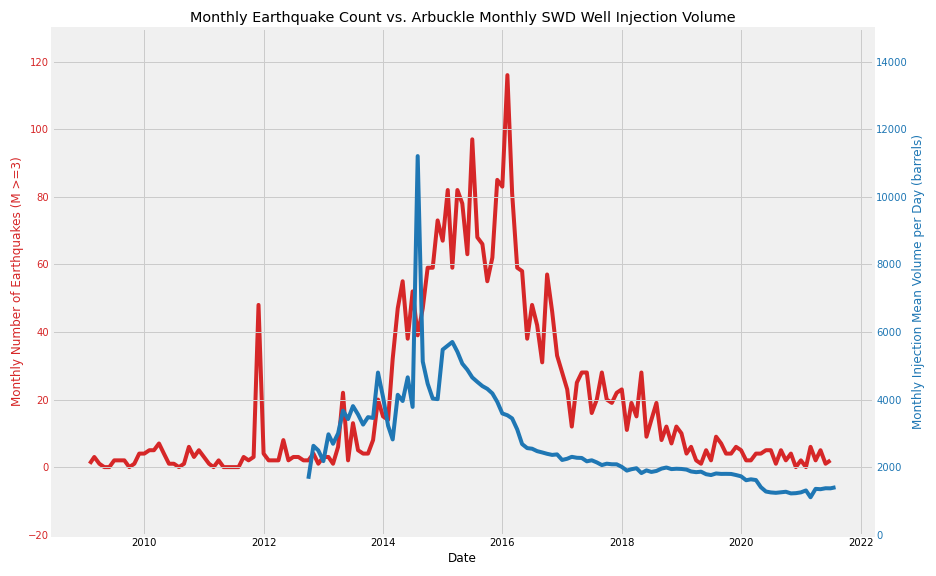

In [187]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.plot(monthly_count_eq_df.index, monthly_count_eq_df.mag, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-20, 130)
ax1.set_title("Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Injection Mean Volume per Day (barrels)', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_mean_inj_df.index, monthly_mean_inj_df.Volume_BPD, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 15000)

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [189]:
monthly_mean_inj_df_copy = monthly_mean_inj_df.copy()

In [192]:
monthly_mean_inj_df_copy.index.names = ['date']
monthly_mean_inj_df_copy.head()

,Volume_BPD
date,
2012-09-30,1654.900000
2012-10-31,2630.161290
2012-11-30,2493.333333
2012-12-31,2177.522523
2013-01-31,2971.658065


In [193]:
merged_df = pd.merge(monthly_mean_inj_df_copy,monthly_count_eq_df,on='date')
merged_df.head()

,Volume_BPD,mag
date,,
2012-09-30,1654.900000,2
2012-10-31,2630.161290,4
2012-11-30,2493.333333,1
2012-12-31,2177.522523,3
2013-01-31,2971.658065,3


<IPython.core.display.Javascript object>


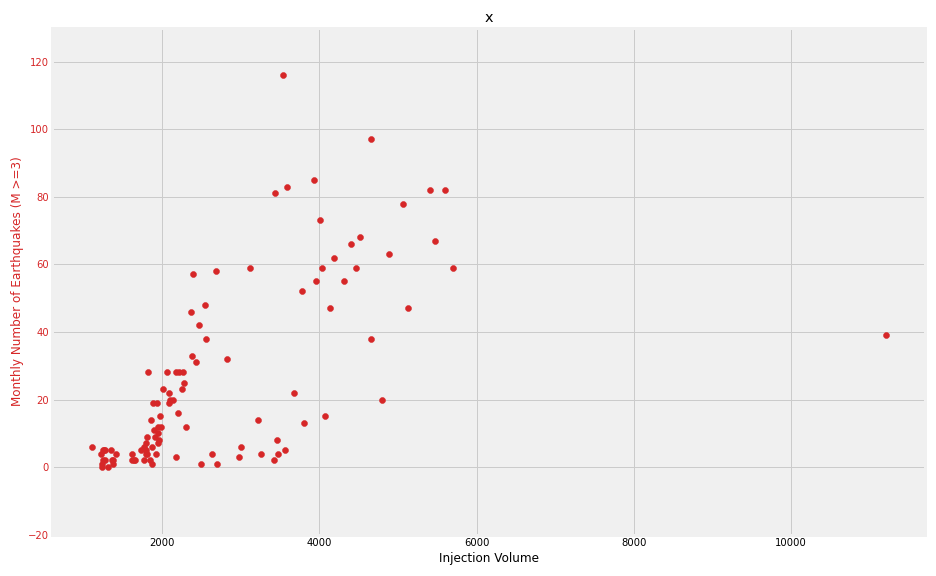

In [197]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Injection Volume')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.scatter(merged_df.Volume_BPD, merged_df.mag, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-20, 130)
ax1.set_title("x")

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [202]:
df_monthly_reduced = pd.read_csv("../oklahoma_earthquakes_largefiles/occ_monthly_reduced.csv", low_memory=False)

In [203]:
df_monthly_reduced.iloc[:, 0] = df_monthly_reduced.iloc[:, 0].apply(pd.to_datetime)
df_monthly_reduced = df_monthly_reduced.sort_values(by="date")
df_monthly_reduced

,date,monthly_volume,count,count_>0
12,2011-01-31,10643949.0,205,141
13,2011-02-28,9144807.0,205,143
14,2011-03-31,11135572.0,205,148
15,2011-04-30,11033870.0,205,155
16,2011-05-31,12309264.0,205,158
...,...,...,...,...
55,2020-08-31,14347672.0,551,291
56,2020-09-30,14347550.0,551,319
57,2020-10-31,13677428.0,551,289
58,2020-11-30,13658160.0,551,282


<IPython.core.display.Javascript object>


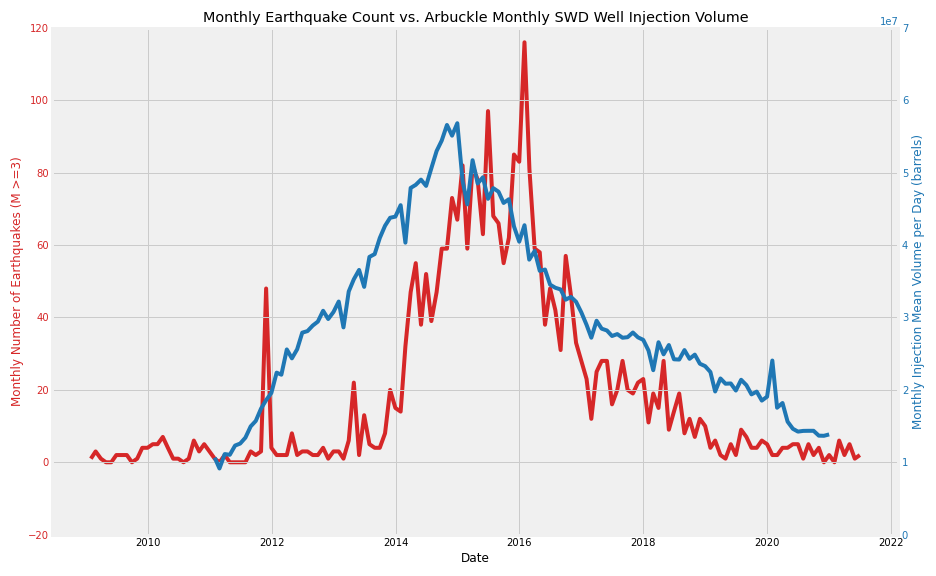

In [260]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.plot(monthly_count_eq_df.index, monthly_count_eq_df.mag, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-20, 120)
ax1.set_title("Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Injection Mean Volume per Day (barrels)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_monthly_reduced.date, df_monthly_reduced.monthly_volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 70000000)

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [214]:
occ_merged = pd.merge(df_monthly_reduced,monthly_count_eq_df,on='date')

In [219]:
occ_merged.describe()

,monthly_volume,count,count_>0,mag
count,1.170000e+02,117.000000,117.000000,117.000000
mean,3.005431e+07,424.948718,316.367521,23.358974
std,1.225385e+07,93.613093,68.932450,26.378695
min,9.144807e+06,205.000000,141.000000,0.000000
25%,2.084938e+07,396.000000,289.000000,3.000000
50%,2.790079e+07,463.000000,341.000000,12.000000
75%,3.918720e+07,474.000000,363.000000,38.000000
max,5.682426e+07,551.000000,407.000000,116.000000


In [265]:
occ_merged.mag.hist()

<AxesSubplot:title={'center':'Monthly Injection Volume vs. Monthly Earthquakes M >= 3'}, xlabel='Injection Volume', ylabel='Monthly Number of Earthquakes (M >=3)'>

<IPython.core.display.Javascript object>


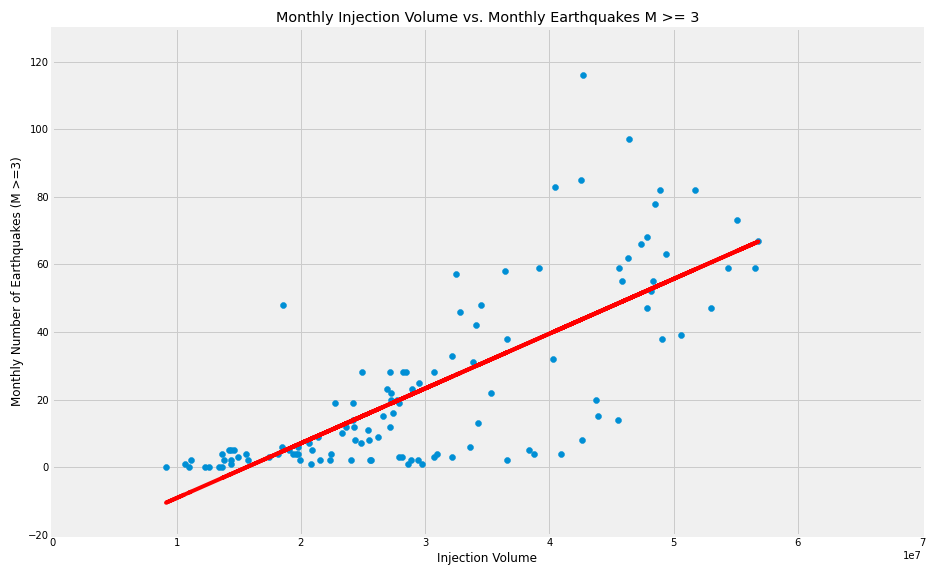

In [263]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Injection Volume')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)')
ax1.scatter(occ_merged.monthly_volume, occ_merged.mag)
ax1.plot(X, Y_pred, color='red')
ax1.tick_params(axis='y')
ax1.set_ylim(-20, 130)
ax1.set_xlim(0, 70000000)
ax1.set_title("Monthly Injection Volume vs. Monthly Earthquakes M >= 3")

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [240]:
X = occ_merged.monthly_volume.values.reshape(-1, 1)  # values converts it into a numpy array
Y = occ_merged.mag.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictionsb

In [292]:
linear_regressor.score(X,Y)

0.5669000311222894

<IPython.core.display.Javascript object>


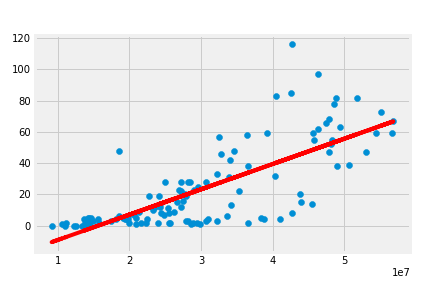

In [241]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [244]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              251.7
Date:                Sun, 01 Aug 2021   Prob (F-statistic):                    7.71e-31
Time:                        11:41:09   Log-Likelihood:                         -515.00
No. Observations:                 117   AIC:                                      1032.
Df Residuals:                     116   BIC:                                      1035.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.966e-07   5.65e-08     15.866      0.000    7.85e-07    1.01e-06
==============================================================================
Omnibus:                       36.447   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.422
Skew:                           1.385   Prob(JB):                     1.03e-14
Kurtosis:                       5.354   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
model.pvalues[0]

7.712000048040633e-31

In [266]:
mag_add = 0.0000000000001
occ_merged["mag+"] = occ_merged.mag+mag_add
occ_merged.head()

,date,monthly_volume,count,count_>0,mag,mag+
0,2011-01-31,10643949.0,205,141,1,1.000000e+00
1,2011-02-28,9144807.0,205,143,0,1.000000e-13
2,2011-03-31,11135572.0,205,148,2,2.000000e+00
3,2011-04-30,11033870.0,205,155,0,1.000000e-13
4,2011-05-31,12309264.0,205,158,0,1.000000e-13


In [279]:
occ_test = occ_merged[["date", "monthly_volume", "mag"]].copy()

In [282]:
caret_df = setup(data = occ_test, target = 'mag', session_id=1)

NameError: name 'setup' is not defined

In [231]:
monthly_count_all_eq = eq_df.groupby(pd.Grouper(key="date",freq='M'))["mag"].count()
monthly_count_all_eq = pd.DataFrame(monthly_count_all_eq)
monthly_count_all_eq.head()

,mag
date,
2009-01-31,2
2009-02-28,3
2009-03-31,4
2009-04-30,0
2009-05-31,3


In [232]:
occ_merged_all_eq = pd.merge(df_monthly_reduced,monthly_count_all_eq,on='date')

<IPython.core.display.Javascript object>


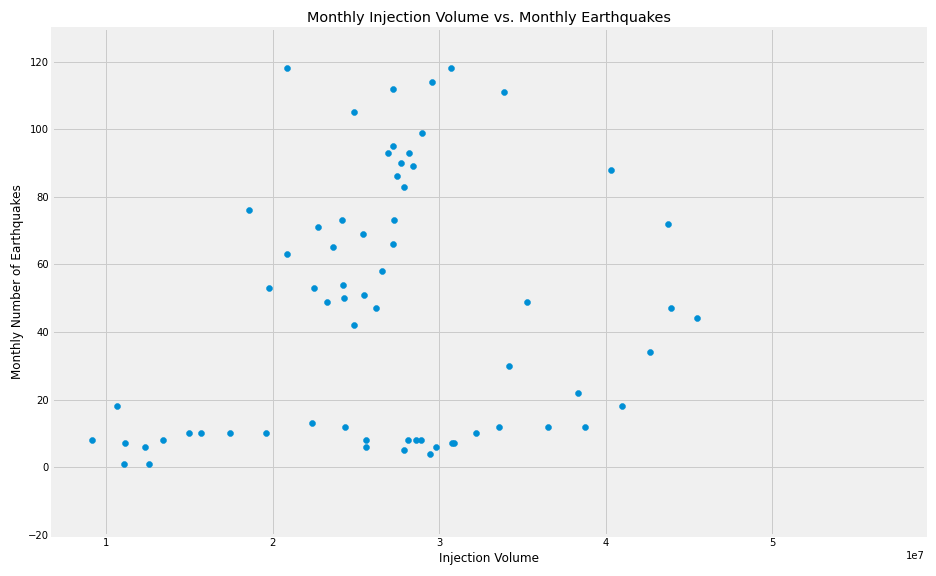

In [234]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Injection Volume')
ax1.set_ylabel('Monthly Number of Earthquakes')
ax1.scatter(occ_merged_all_eq.monthly_volume, occ_merged_all_eq.mag)
ax1.tick_params(axis='y')
ax1.set_ylim(-20, 130)
ax1.set_title("Monthly Injection Volume vs. Monthly Earthquakes")

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<IPython.core.display.Javascript object>


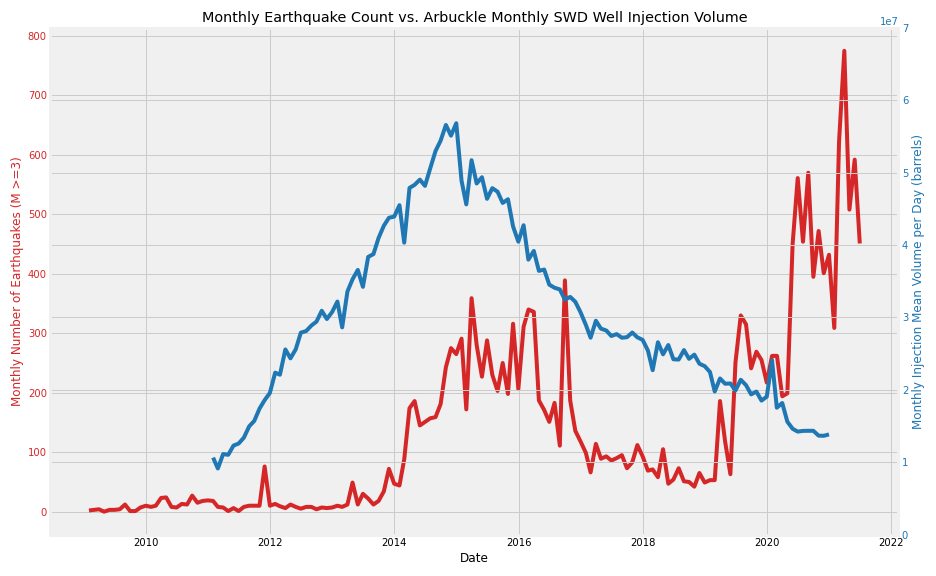

In [236]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.plot(monthly_count_all_eq.index, monthly_count_all_eq.mag, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim(-20, 120)
ax1.set_title("Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Injection Mean Volume per Day (barrels)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_monthly_reduced.date, df_monthly_reduced.monthly_volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 70000000)

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<IPython.core.display.Javascript object>


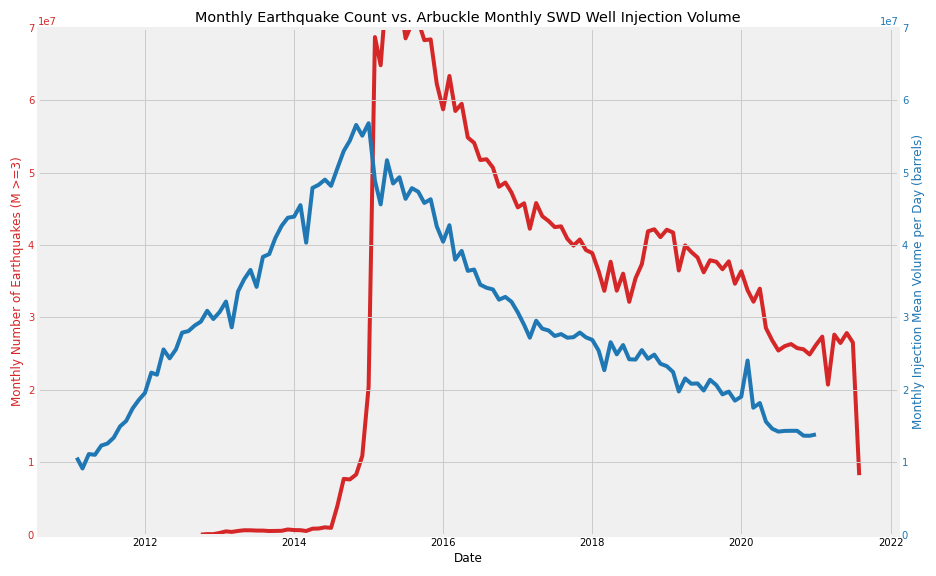

In [306]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.plot(monthly_sum_inj_df.index, monthly_sum_inj_df.Volume_BPD, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 70000000)
ax1.set_title("Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Injection Mean Volume per Day (barrels)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_monthly_reduced.date, df_monthly_reduced.monthly_volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 70000000)

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()